In [109]:
import skmob
import pandas as pd
import json
from datetime import datetime
import warnings

warnings.filterwarnings(action='once')

C:\Users\dvlac\Anaconda3\envs\skmob\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [110]:
date_init = datetime(2013, 1, 1,0,0,0)  # I know the initial date of my data set
time_0=int(datetime.timestamp(date_init))
time_0

C:\Users\dvlac\Anaconda3\envs\skmob\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1357027200

In [111]:

data = pd.read_csv('KenToy_2d.txt', sep = " ", names = ['time', 'lon', 'lat'])
data['user_id']=1
data['date'] = data['time'].apply(lambda x: datetime.fromtimestamp(int(x)+time_0))

In [112]:
data = data[['user_id', 'lat', 'lon','date']] 
data.head()

,user_id,lat,lon,date
0,1,47.655602,-122.143120,2013-01-01 02:17:37
1,1,47.656010,-122.143120,2013-01-01 03:17:40
2,1,47.658028,-122.143166,2013-01-01 03:17:53
3,1,47.661976,-122.143082,2013-01-01 03:18:16
4,1,47.665642,-122.142990,2013-01-01 03:18:37


Note that:

-name of columns in data_df don't match the names required

-you must specify the names of the mandatory columns using arguments latitude, longitude and datetime

In [113]:
# Create a TrajDataFrame from a DataFrame
tdf = skmob.TrajDataFrame(data, 
                          latitude='lat', 
                          datetime='date', 
                          longitude='lon')

print(type(tdf))
tdf.head()

<class 'skmob.core.trajectorydataframe.TrajDataFrame'>


C:\Users\dvlac\Anaconda3\envs\skmob\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,user_id,lat,lng,datetime
0,1,47.655602,-122.143120,2013-01-01 02:17:37
1,1,47.656010,-122.143120,2013-01-01 03:17:40
2,1,47.658028,-122.143166,2013-01-01 03:17:53
3,1,47.661976,-122.143082,2013-01-01 03:18:16
4,1,47.665642,-122.142990,2013-01-01 03:18:37


We can plot the data

In [114]:
tdf.plot_trajectory(zoom=11, weight=3, opacity=0.9, tiles='Stamen Toner')

C:\Users\dvlac\Anaconda3\envs\skmob\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\dvlac\Anaconda3\envs\skmob\lib\site-packages\scikit_mobility-1.0-py3.7.egg\skmob\utils\plot.py:143: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


## Not every lon lat point is a stop, the data must be filteretd

In [115]:
## Before filtering let's plot al points
## see documentation here: 
## https://github.com/scikit-mobility/tutorials/blob/master/AMLD%202020/Part%2002%20-%20Real-World%20Mobility%20Data.ipynb
tdf['leaving_datetime'] = tdf.datetime
user0_map = tdf.plot_stops(zoom=11)
# plot the trajectory of the user
tdf.plot_trajectory(map_f=user0_map)

In [116]:
tdf.head()

,user_id,lat,lng,datetime,leaving_datetime
0,1,47.655602,-122.143120,2013-01-01 02:17:37,2013-01-01 02:17:37
1,1,47.656010,-122.143120,2013-01-01 03:17:40,2013-01-01 03:17:40
2,1,47.658028,-122.143166,2013-01-01 03:17:53,2013-01-01 03:17:53
3,1,47.661976,-122.143082,2013-01-01 03:18:16,2013-01-01 03:18:16
4,1,47.665642,-122.142990,2013-01-01 03:18:37,2013-01-01 03:18:37


In [117]:
print('# users: %s' %len(tdf.user_id.unique()))
print('# points: %s' %len(tdf))
print('time window: %s' 
      %(tdf.iloc[-1].datetime - tdf.iloc[0].datetime))

# users: 1
# points: 592
time window: 2 days 18:55:59


C:\Users\dvlac\Anaconda3\envs\skmob\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


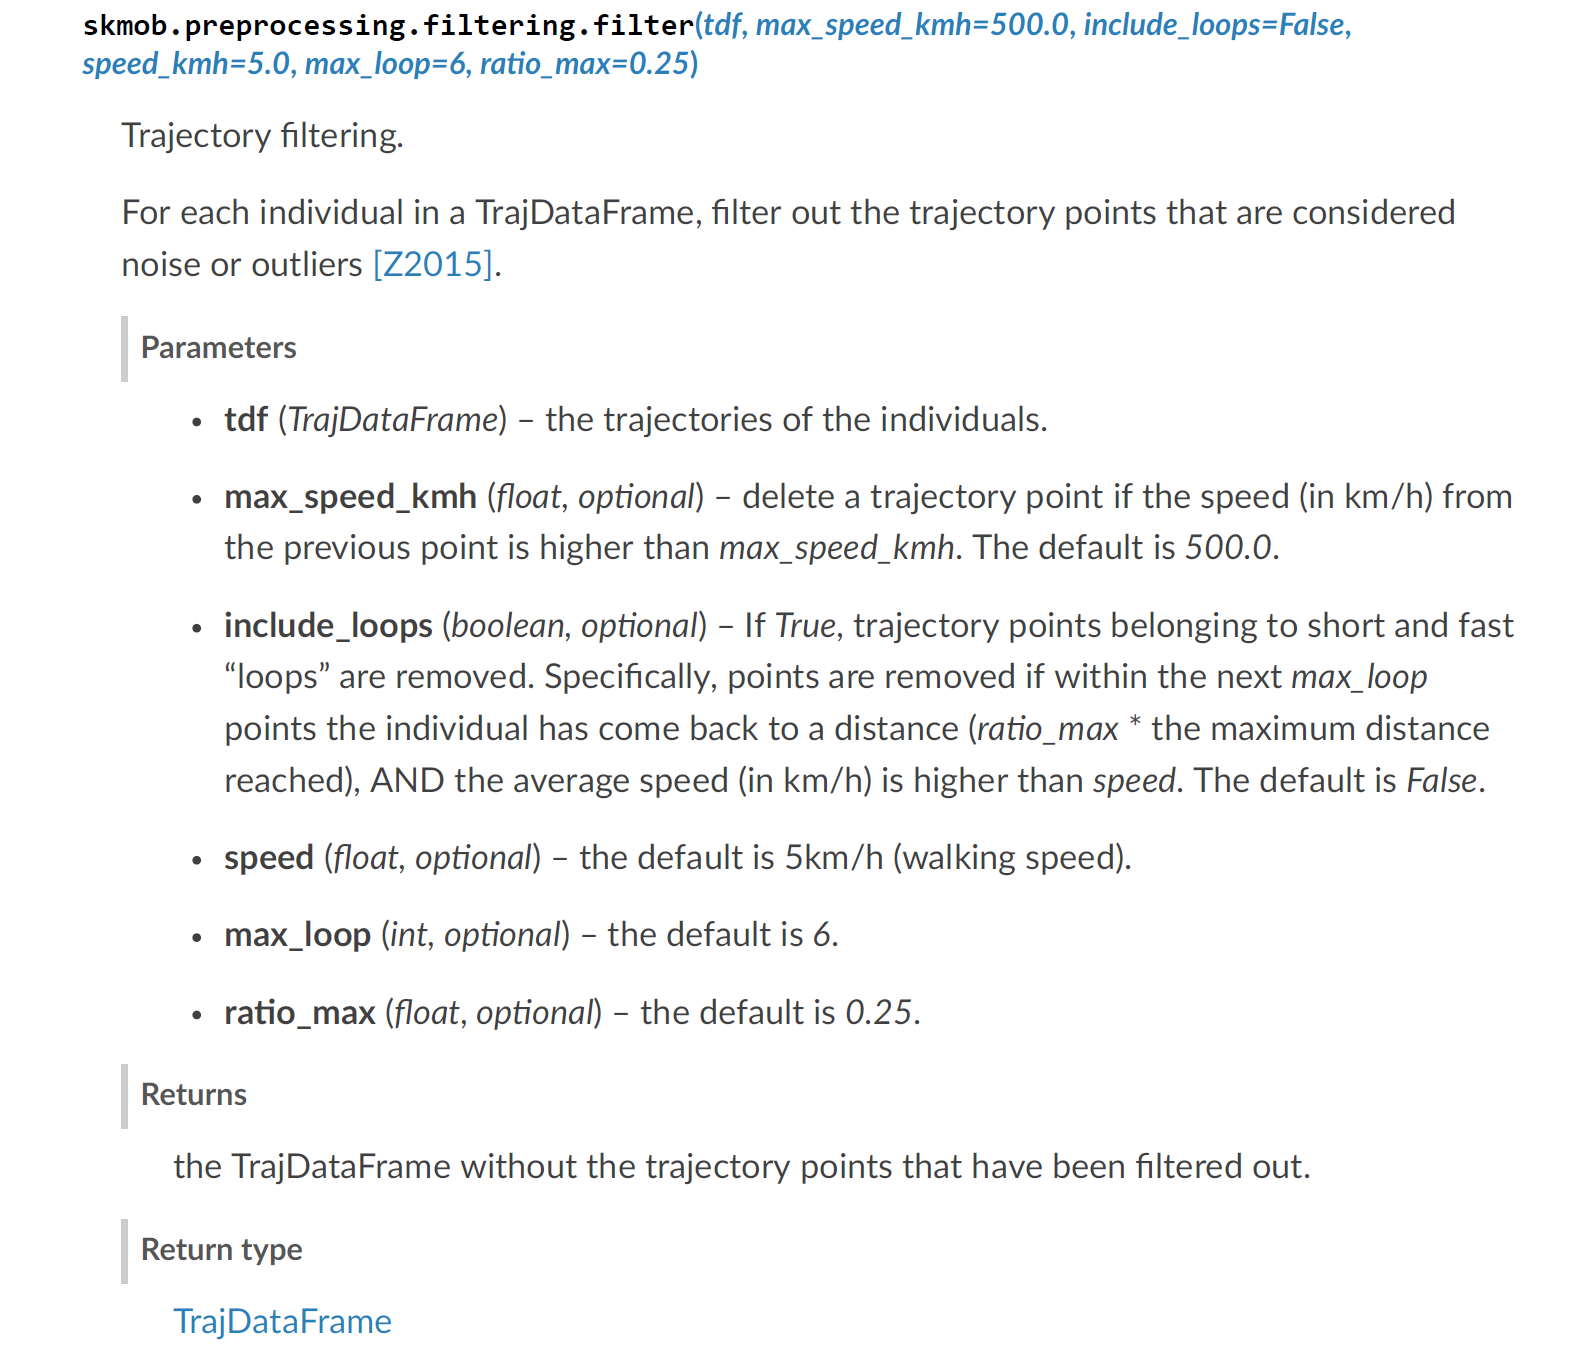

In [118]:
from skmob.preprocessing import filtering

ftdf = filtering.filter(tdf, max_speed_kmh=500.)

from IPython.display import Image
Image(filename ="Capture_Filtering.png", width=1000, height=1000)

In [119]:
ftdf.parameters

{'filter': {'function': 'filter',
  'max_speed_kmh': 500.0,
  'include_loops': False,
  'speed_kmh': 5.0,
  'max_loop': 6,
  'ratio_max': 0.25}}

In [120]:
print('Points of the raw trajectory:\t\t%s'%len(tdf))
print('Points of the filtered trajectory:\t%s'%len(ftdf))
print('Filtered points:\t\t\t%s'%(len(tdf)-len(ftdf)))

Points of the raw trajectory:		592
Points of the filtered trajectory:	592
Filtered points:			0


## Compressing trajectories

Reduce the number of points of the trajectory, preserving the structure.

Merge together all points that are closer than spatial_radius_km=0.2 kilometers from each other.

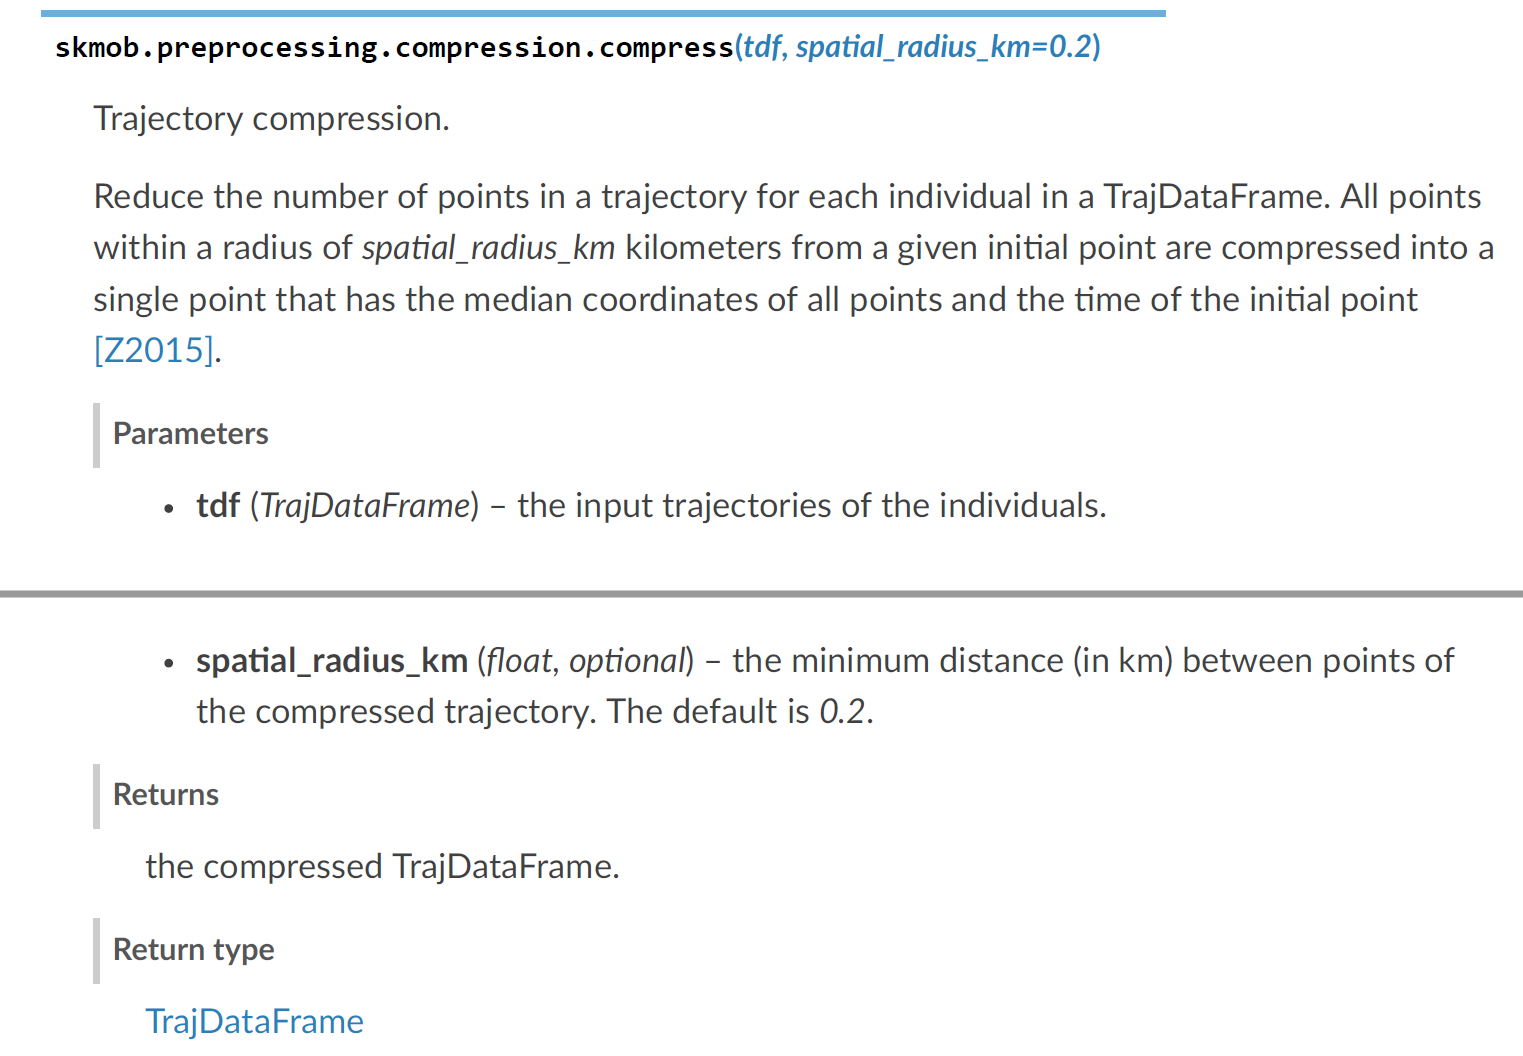

In [121]:
Image(filename ="Capture_Compression.png", width=1000, height=1000)

In [153]:
from skmob.preprocessing import compression


ctdf = compression.compress(ftdf, spatial_radius_km=4)
ctdf.head()

C:\Users\dvlac\Anaconda3\envs\skmob\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,user_id,lat,lng,datetime,leaving_datetime
0,1,47.682121,-122.127586,2013-01-01 02:17:37,2013-01-01 17:30:23
1,1,47.620518,-122.305000,2013-01-01 17:47:57,2013-01-01 20:00:58
2,1,47.675041,-122.143082,2013-01-01 22:23:37,2013-01-01 22:29:13
3,1,47.682144,-122.141357,2013-01-01 22:29:29,2013-01-02 16:20:02
4,1,47.663414,-122.136322,2013-01-02 16:20:20,2013-01-03 01:52:21


In [154]:
len(ctdf) # Much smaller

C:\Users\dvlac\Anaconda3\envs\skmob\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


12

In [155]:
user0_map = ctdf.plot_stops(zoom=11)
# plot the trajectory of the user
ctdf.plot_trajectory(map_f=user0_map) ##it is hard to capture in the visualization

C:\Users\dvlac\Anaconda3\envs\skmob\lib\site-packages\scikit_mobility-1.0-py3.7.egg\skmob\utils\plot.py:245: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


## Stop detection

Identify locations where the user spent at least `minutes_for_a_stop` minutes within a distance `spatial_radius_km` $\times$ `stop_radius_factor`, from a given point. 

A new column `leaving_datetime` is added, indicating the time when the user departs from the stop.

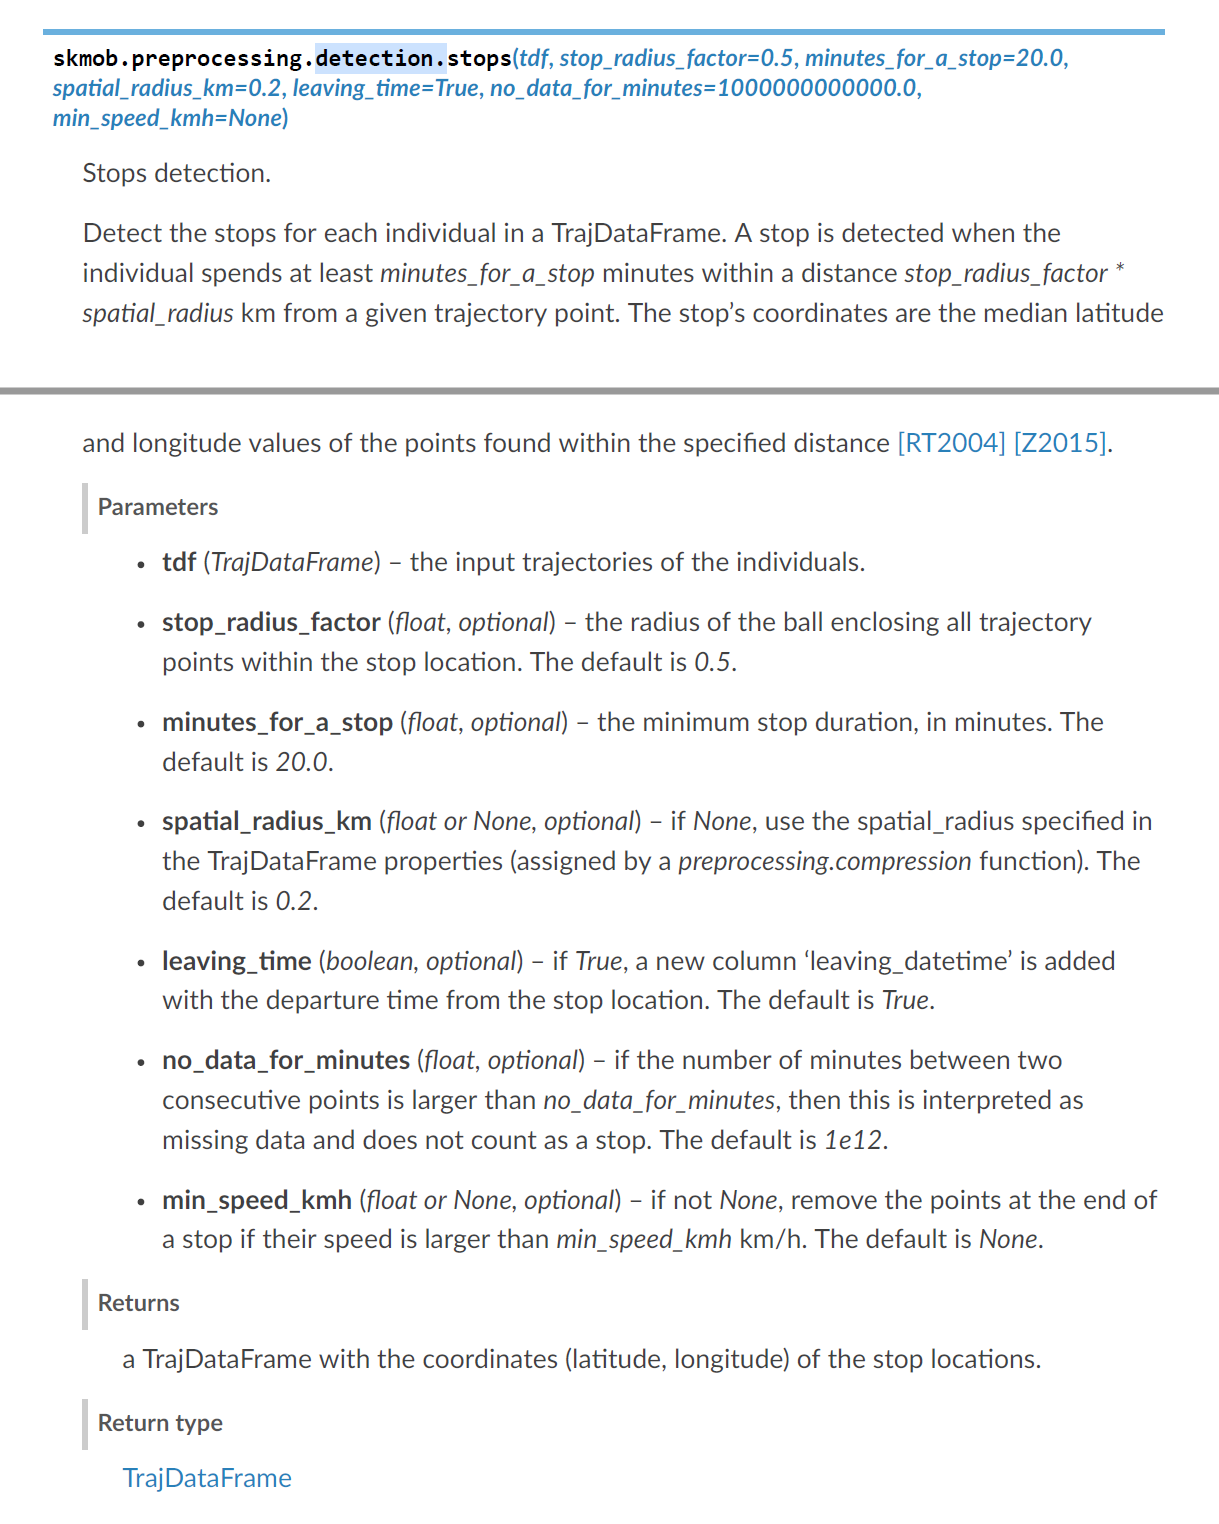

In [156]:
from skmob.preprocessing import detection
Image(filename ="Capture_StopsDetection.png", width=1000, height=1000)

In [157]:
stdf = detection.stops(ctdf, stop_radius_factor=0.5, \
            minutes_for_a_stop=20.0, spatial_radius_km=0.2, 
                       leaving_time=True)
len(stdf)

4

In [158]:
stdf.parameters

{'filter': {'function': 'filter',
  'max_speed_kmh': 500.0,
  'include_loops': False,
  'speed_kmh': 5.0,
  'max_loop': 6,
  'ratio_max': 0.25},
 'compress': {'function': 'compress', 'spatial_radius_km': 4},
 'detect': {'function': 'stops',
  'stop_radius_factor': 0.5,
  'minutes_for_a_stop': 20.0,
  'spatial_radius_km': 0.2,
  'leaving_time': True,
  'no_data_for_minutes': 1000000000000.0,
  'min_speed_kmh': None}}

#### Visualise the compressed trajectory and the stops

Click on the stop markers to see a pop up with: 
- User ID
- Coordinates of the stop (click to see the location on Google maps)
- Arrival time
- Departure time

In [159]:
map_f = stdf.plot_trajectory(max_points=1000, hex_color=-1, start_end_markers=False)
stdf.plot_stops(map_f=map_f, hex_color=-1)

## Stops define <font color="blue">trips</font>
Let's take the first trip of the individual using the stops

In [160]:
stdf.head()

,user_id,lat,lng,datetime,leaving_datetime
0,1,47.682121,-122.127586,2013-01-01 02:17:37,2013-01-01 17:47:57
1,1,47.620518,-122.305000,2013-01-01 17:47:57,2013-01-01 22:23:37
2,1,47.675041,-122.141357,2013-01-01 22:23:37,2013-01-03 01:52:37
3,1,47.661095,-122.322960,2013-01-03 02:12:05,2013-01-03 07:12:24


In [161]:
# select all points between the first two stops
dt1 = stdf.iloc[0]['datetime']
dt2 = stdf.iloc[1]['leaving_datetime']
tid1_tdf = tdf[(tdf.datetime >= dt1) 
                           & (tdf.datetime <= dt2)]
tid1_tdf.head()

C:\Users\dvlac\Anaconda3\envs\skmob\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,user_id,lat,lng,datetime,leaving_datetime
0,1,47.655602,-122.143120,2013-01-01 02:17:37,2013-01-01 02:17:37
1,1,47.656010,-122.143120,2013-01-01 03:17:40,2013-01-01 03:17:40
2,1,47.658028,-122.143166,2013-01-01 03:17:53,2013-01-01 03:17:53
3,1,47.661976,-122.143082,2013-01-01 03:18:16,2013-01-01 03:18:16
4,1,47.665642,-122.142990,2013-01-01 03:18:37,2013-01-01 03:18:37


In [162]:
# plot the trip
tid1_map = tid1_tdf.plot_trajectory(zoom=13, weight=5, opacity=0.9, tiles='Stamen Toner', )
tid1_map

C:\Users\dvlac\Anaconda3\envs\skmob\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\dvlac\Anaconda3\envs\skmob\lib\site-packages\scikit_mobility-1.0-py3.7.egg\skmob\utils\plot.py:143: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


Compute the length of the trip and the distance between origin and destination

In [163]:
from skmob.utils.gislib import getDistanceByHaversine
from skmob.measures.individual import distance_straight_line
# take origin and destination of the trip
start_loc = tid1_tdf.iloc[0][['lat', 'lng']]
end_loc = tid1_tdf.iloc[-1][['lat', 'lng']]
# compute distance between origin and destination
print("distance:", getDistanceByHaversine(end_loc, start_loc))

distance: 0.9545802013375194


In [164]:
distance_straight_line(tid1_tdf)

,distance_straight_line
0,35.929154


In [165]:
def average_stops_per_day(tdf, stop_radius_factor=0.5, minutes_for_a_stop=20.0, 
                                   spatial_radius_km=0.2):
    """
    Average number of stops per day
    """
    def get_stops_per_day(user_stdf):
        return user_stdf.groupby(user_stdf.leaving_datetime.dt.floor('d')).size().reset_index(name='count').mean()

    stdf = detection.stops(tdf, stop_radius_factor=stop_radius_factor, 
                             minutes_for_a_stop=minutes_for_a_stop, 
                           spatial_radius_km=spatial_radius_km, 
                             leaving_time=True)
    return stdf.groupby('user_id').apply(lambda user_stdf: get_stops_per_day(user_stdf)).reset_index().rename(columns={'count': 'avg_stops_per_day'})             

C:\Users\dvlac\Anaconda3\envs\skmob\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [166]:
average_stops_per_day(tdf)

C:\Users\dvlac\Anaconda3\envs\skmob\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  import sys


,user_id,avg_stops_per_day
0,1,3.333333


# Individual measures

- computed on the trajectories of a <u>single individual</u>
- quantify standard *mobility patterns*
- examples: 
    - radius of gyration
    - jump lengths
    - max distance
    - Optional: individual mobility network

## Radius of gyration $r_g$
characteristic distance traveled by an individual:

$$r_g = \sqrt{\frac{1}{N} \sum_{i=1}^N (\mathbf{r}_i - \mathbf{r}_{cm})^2}$$

$r_{cm}$ is the position vector of the *center of mass* of the set of locations visited by the individual

In [167]:
from skmob.measures.individual import radius_of_gyration
rg_df = radius_of_gyration(stdf)
rg_df.head()

C:\Users\dvlac\Anaconda3\envs\skmob\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,radius_of_gyration
0,7.250887


## Jump lengths
- a jump length is is the distance between two consecutive visits of an individual
- given a `TrajDataFrame`, skmob computes the lengths for each individual independently
- use the `jump_lengths` function

In [168]:
from skmob.measures.individual import jump_lengths

C:\Users\dvlac\Anaconda3\envs\skmob\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [169]:
jl_df = jump_lengths(tdf) # disable progress bar with show_progress=False
jl_df = jump_lengths(tdf) # disable progress bar with show_progress=False
jl_df.head()

,jump_lengths
0,"[0.04536753006999594, 0.2244178095352494, 0.43..."


In [170]:
jl_list = jump_lengths(stdf, merge=True)
type(jl_list)

C:\Users\dvlac\Anaconda3\envs\skmob\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


pandas.core.frame.DataFrame

In [171]:
from skmob.measures.individual import max_distance_from_home, distance_straight_line, maximum_distance

In [172]:
md_df = maximum_distance(tdf)

In [173]:
md_df

,maximum_distance
0,14.398627


## Individual mobility network
a network where: 
- nodes represent locations visited by the individual
- directed edges represent trips between the locations made by the individual 

In [174]:
from skmob.measures.individual import individual_mobility_network

C:\Users\dvlac\Anaconda3\envs\skmob\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [175]:
imn_df = individual_mobility_network(stdf)
imn_df.head()

,lat_origin,lng_origin,lat_dest,lng_dest,n_trips
0,47.682121,-122.127586,47.620518,-122.305000,1
1,47.620518,-122.305000,47.675041,-122.141357,1
2,47.675041,-122.141357,47.661095,-122.322960,1


In [176]:
imn_df.sort_values(by='n_trips', ascending=False).head(100)

C:\Users\dvlac\Anaconda3\envs\skmob\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,lat_origin,lng_origin,lat_dest,lng_dest,n_trips
0,47.682121,-122.127586,47.620518,-122.305000,1
1,47.620518,-122.305000,47.675041,-122.141357,1
2,47.675041,-122.141357,47.661095,-122.322960,1


In [177]:
len(imn_df)  ## This case makes sense with clustered locations.

C:\Users\dvlac\Anaconda3\envs\skmob\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


3

In [178]:
from skmob.measures.collective import visits_per_location

In [181]:
vpl_df = visits_per_location(ctdf)
vpl_df.head(1000)

C:\Users\dvlac\Anaconda3\envs\skmob\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,lat,lng,n_visits
0,47.620518,-122.305000,1
1,47.630947,-122.169319,1
2,47.640711,-122.215477,1
3,47.640839,-122.216980,1
4,47.643864,-122.278687,1
5,47.646225,-122.140694,1
6,47.658863,-122.136123,1
7,47.661095,-122.322960,1
8,47.663414,-122.136322,1
9,47.675041,-122.143082,1


### Many many other measures can be computed with scikit-mobility. 
#### Just check the documentation https://scikit-mobility.github.io/scikit-mobility/reference/measures.html

#### for example origin destination matrix, and home detection

In [182]:
from skmob.measures.individual import home_location
hl_df = home_location(ctdf)
print(hl_df.head())

         lat         lng
0  47.640711 -122.215477


C:\Users\dvlac\Anaconda3\envs\skmob\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [183]:
from skmob.measures.individual import number_of_locations,location_frequency
nl_df = number_of_locations(ctdf)
print(nl_df.head())
df_max = max_distance_from_home(ctdf)
print(df_max.head())


   number_of_locations
0                   12
   max_distance_from_home
0                8.364093


C:\Users\dvlac\Anaconda3\envs\skmob\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
